In [20]:
%matplotlib inline
import cv2 as cv
import numpy as np
import os
from matplotlib import pyplot as plt
from keras.models import load_model

Using TensorFlow backend.


In [21]:
model = load_model('transfer_learning/cmnist/cmnist.h5')

In [2]:
def img_show(img):
    fig = plt.figure()
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [151]:
def digit_sort(position):
    position_list = list()
    position = sorted(position, key=lambda i: i[0])
    for i, j in enumerate(position):
        try:
            if position[i][0] + position[i][2] > position[i + 1][0] + position[i + 1][2]:
                pass
            else:
                position_list.append(j)
        except:
            position_list.append(j)            
    return position_list

In [27]:
def img_resize(img):
    return cv.resize(img, (28, 28))

In [17]:
def img_normalize(img):
    return img / 255

In [34]:
def get_class(i):
    class_str = '0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N O P Q R S T U V W X Y Z'
    class_list = class_str.split()
    return class_list[i]

In [206]:
def test(img_name):
    img_name = img_name.split('.')[0]
    path = 'datasets/captcha_original/%s.png' % (img_name) 
    img = cv.imread(path, 0)
    ret, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
    img2, contours, hierarchy = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    digit_list = list()
    for i, j in enumerate(contours):
        if (cv.contourArea(j) < 1000) and (cv.contourArea(j) > 150):
            [x, y, w, h] = cv.boundingRect(j)
            digit_list.append([x, y, w, h])
    digit_list_sort = digit_sort(digit_list)
    prediction_list = list()
    for i in digit_list_sort:
        x, y, w, h = i[0], i[1], i[2], i[3]
        cv.rectangle(img, (x - 10, y - 10), (x + w + 10, y + h + 10), (0, 255, 0), 2)
        roi = thresh[y - 10 : y + h + 10, x - 10 : x + w + 10]
        digit = img_normalize(img_resize(roi))
        digit = digit.reshape(1, 28, 28, 1).astype('float32')
        prediction = str(get_class(model.predict_classes(digit)[0]))
        prediction_list.append(prediction)
    prediction = ''
    for i in prediction_list:
        prediction += i
    if img_name == prediction:
        return True
    else:
        return False

In [207]:
def main(img_name):
    path = 'datasets/captcha_original/%s.png' % (img_name) 
    img0 = cv.imread(path)
    img_show(img0)
    img = cv.imread(path, 0)
    img_show(img)
    ret, thresh = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV)
    img_show(thresh)
    img2, contours, hierarchy = cv.findContours(thresh, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)
    digit_list = list()
    for i, j in enumerate(contours):
        if (cv.contourArea(j) < 1000) and (cv.contourArea(j) > 150):
            [x, y, w, h] = cv.boundingRect(j)
            digit_list.append([x, y, w, h])
    digit_list_sort = digit_sort(digit_list)
    prediction_list = list()
    for i in digit_list_sort:
        x, y, w, h = i[0], i[1], i[2], i[3]
        cv.rectangle(img0, (x - 10, y - 10), (x + w + 10, y + h + 10), (0, 255, 0), 2)
        roi = thresh[y - 10 : y + h + 10, x - 10 : x + w + 10]
        digit = img_normalize(img_resize(roi))
        img_show(digit)
        digit = digit.reshape(1, 28, 28, 1).astype('float32')
        prediction = str(get_class(model.predict_classes(digit)[0]))
        prediction_list.append(prediction)
        print('Predict: %s' % prediction)
    img_show(img0)
    prediction = ''
    for i in prediction_list:
        prediction += i
    print('Predict: %s' % prediction)

In [209]:
path = 'datasets/captcha_original/' 
T = 0
F = 0
for i in os.listdir(path):
    try:
        if '.png' in i:
            if test(i):
                T += 1
            else:
                F += 1
    except:
        F += 1
print('Total: %d' % (T + F))
print('Success: %d' % T)
print('Fail: %d' % F)
print('Successful Rate: %.2f' % (T / (T + F)))

Total: 2028
Success: 530
Fail: 1498
Successful Rate: 0.26


0B6615


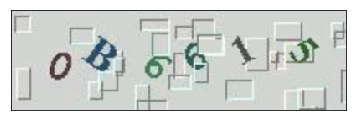

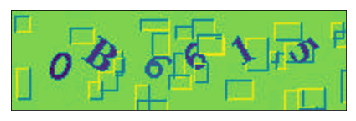

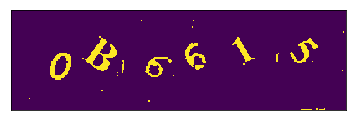

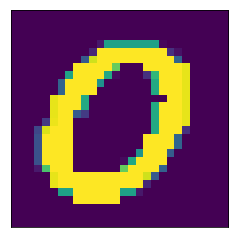

Predict: 0


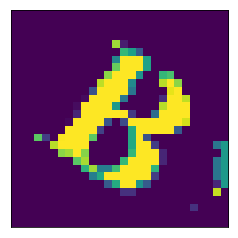

Predict: B


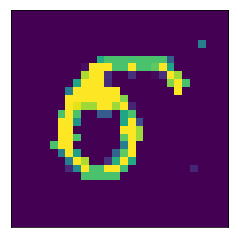

Predict: 6


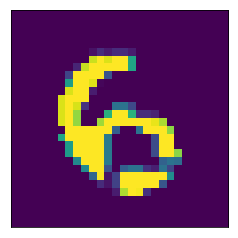

Predict: 6


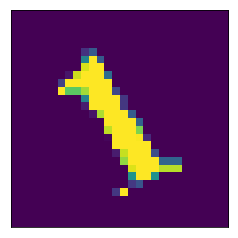

Predict: 1


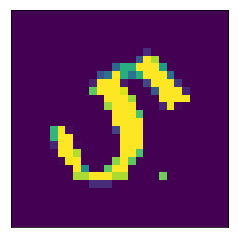

Predict: 5


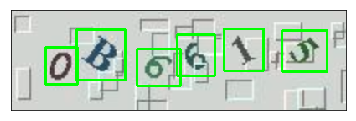

Predict: 0B6615


In [208]:
main(input())